In [1]:
import numpy
import matplotlib.pyplot as plt 
import pandas
import mglearn
import scipy

import sklearn
import sklearn.ensemble  # import seperatley otherwise sub module won't be imported
import sklearn.neural_network # import seperatley otherwise sub module won't be imported

import graphviz
import mpl_toolkits.mplot3d as plt3dd

## Preprocessing methods

In [2]:
cancer = sklearn.datasets.load_breast_cancer();
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer.data, cancer.target,random_state=1);

In [3]:
scalar = sklearn.preprocessing.MinMaxScaler();
scalar.fit(X_train);

X_train_scaled = scalar.transform(X_train);
print("transformed shape: {}".format(X_train_scaled.shape));
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)));
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)));
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)));
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)));

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [4]:
X, _ = sklearn.datasets.make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = sklearn.model_selection.train_test_split(X, random_state=5, test_size=.1);

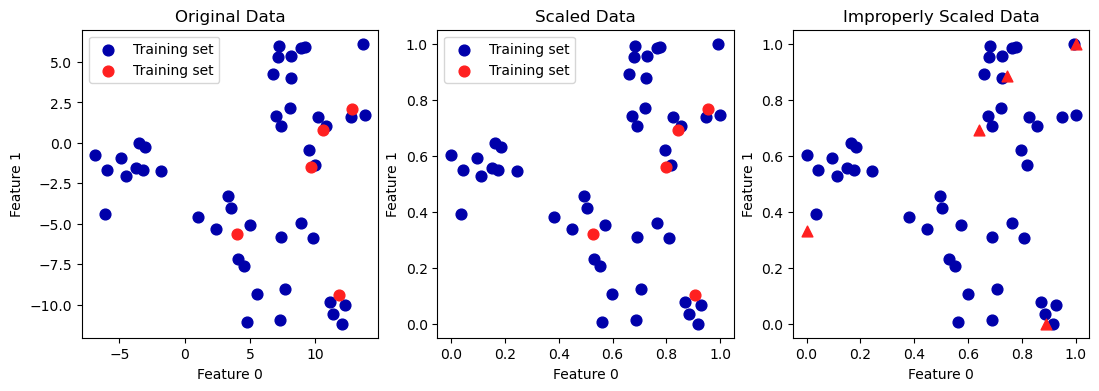

In [5]:
fig, axes = plt.subplots(1,3, figsize=(13,4));

axes[0].scatter(X_train[:,0], X_train[:,1], color=mglearn.cm2(0), label="Training set", s=60);
axes[0].scatter(X_test[:,0], X_test[:,1], color=mglearn.cm2(1), label="Training set", s=60);
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

scalar = sklearn.preprocessing.MinMaxScaler();
scalar.fit(X_train);
X_train_scaled = scalar.transform(X_train);
X_test_scaled = scalar.transform(X_test);

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], color=mglearn.cm2(0), label="Training set", s=60);
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], color=mglearn.cm2(1), label="Training set", s=60);
axes[1].legend(loc='upper left')
axes[1].set_title("Scaled Data")


# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = sklearn.preprocessing.MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', color=mglearn.cm2(1), label="Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

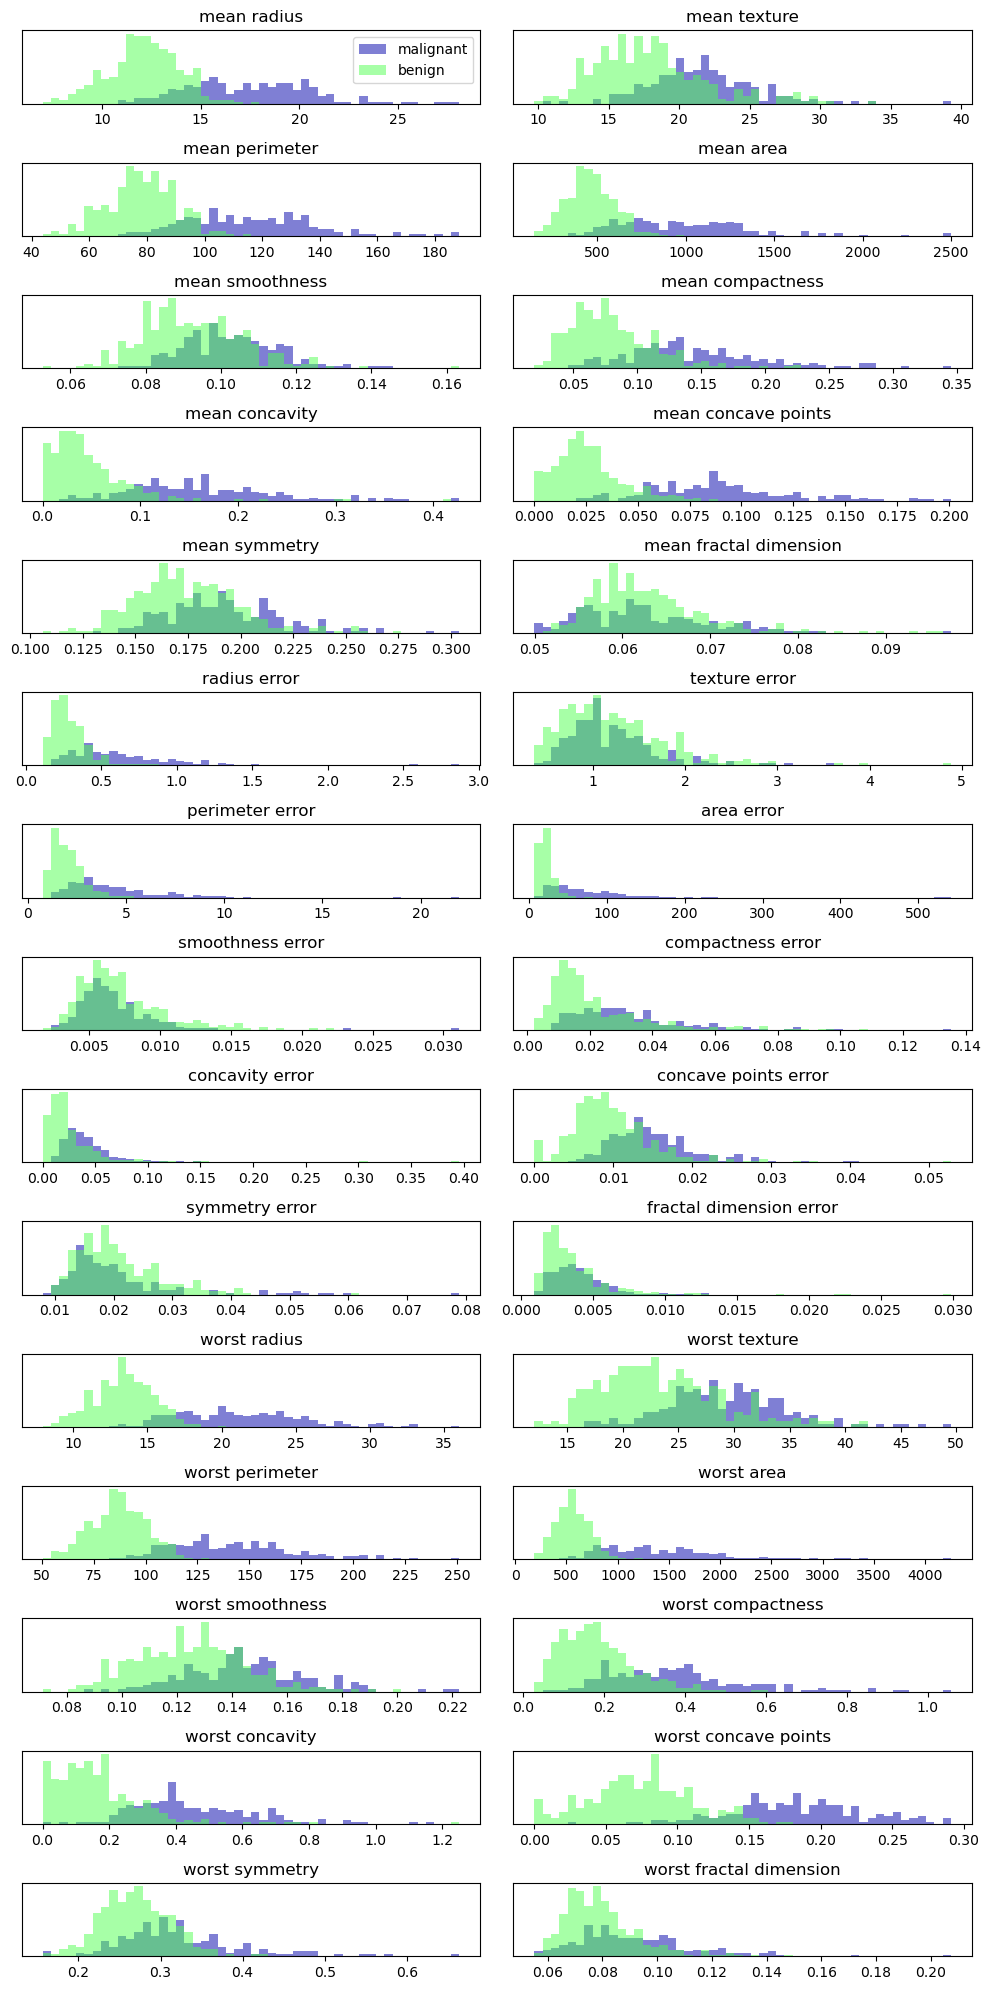

In [9]:
cancer = sklearn.datasets.load_breast_cancer();

fig, axes = plt.subplots(15, 2, figsize=(10, 20));
malignant = cancer.data[cancer.target==0];
benign = cancer.data[cancer.target==1];

ax = axes.ravel();

for i in range(30):
    _, bins = numpy.histogram(cancer.data[:,i], bins=50);
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5);
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5);
    ax[i].set_title(cancer.feature_names[i]);
    ax[i].set_yticks(());

# ax[0].set_xlabel("Feature magnitude");
# ax[0].set_ylabel("Frequency");
ax[0].legend(["malignant", "benign"], loc="best");
fig.tight_layout();

In [10]:
scalar = sklearn.preprocessing.MinMaxScaler();
scalar.fit(cancer.data);
X_scaled = scalar.transform(cancer.data);

pca = sklearn.decomposition.PCA(n_components=2);
pca.fit(X_scaled); 


## Eigenfaces for feature extraction

In [70]:
people = sklearn.datasets.fetch_lfw_people(min_faces_per_person=20, resize = 0.7);

people.images.shape: (3023, 87, 65)
Number of classes: 62


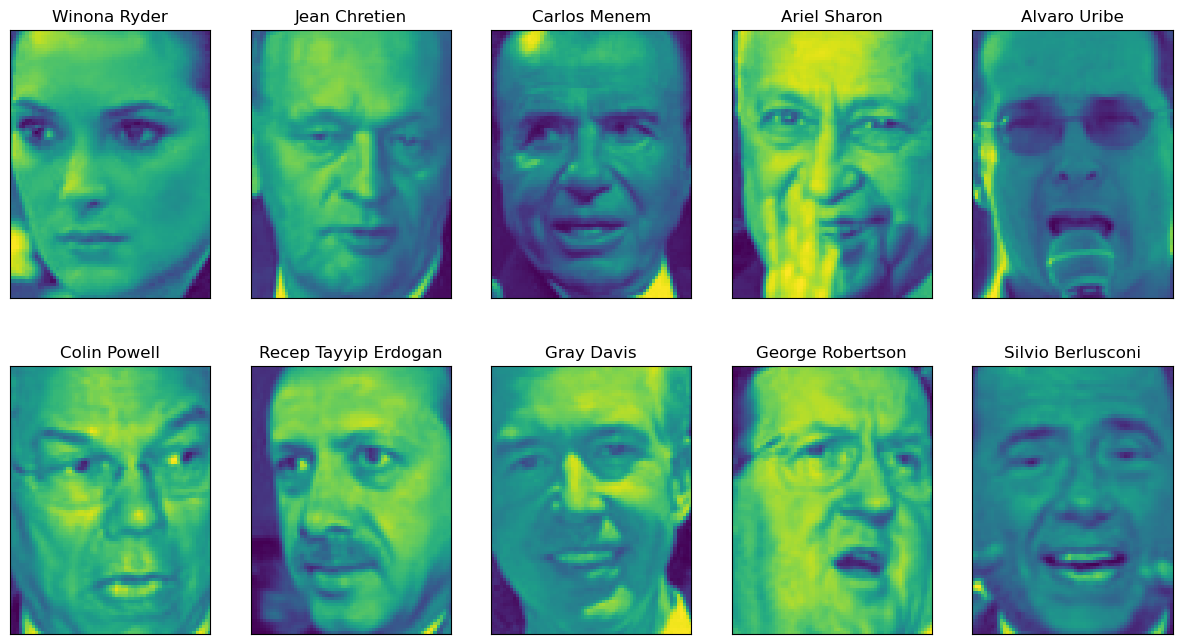

In [89]:
image_shape = people.images[0].shape


fig, axes = plt.subplots(2,5, figsize=(15,8), subplot_kw={"xticks":(), "yticks":()});
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image);
    ax.set_title(people.target_names[target]);

print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

In [4]:
counts = numpy.bincount(people.target);

for i, (count,name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ');
    if ((i+1)%2 == 0): print();

Alejandro Toledo           39 Alvaro Uribe               35 
Amelie Mauresmo            21 Andre Agassi               36 
Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 
Bill Clinton               29 Carlos Menem               21 
Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 
George W Bush             530 Gerhard Schroeder         109 
Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 
Hans Blix                  39 Hugo Chavez                71 
Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 
Jennifer Aniston           21 Jennifer Capriati          42 
Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 
John Negroponte         

In [55]:
mask = numpy.zeros(people.target.shape, dtype = bool);

for target in numpy.unique(people.target):
    mask[numpy.where(people.target == target)[0][:50]] = 1;

X_people = people.data[mask];
y_people = people.target[mask];

X_people /= 255;

In [56]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_people, y_people, random_state=0, stratify=y_people);
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1);
knn.fit(X_train, y_train);

print("Test set scor of 1-nn: {:4.2f}".format(knn.score(X_test, y_test)));

Test set scor of 1-nn: 0.22


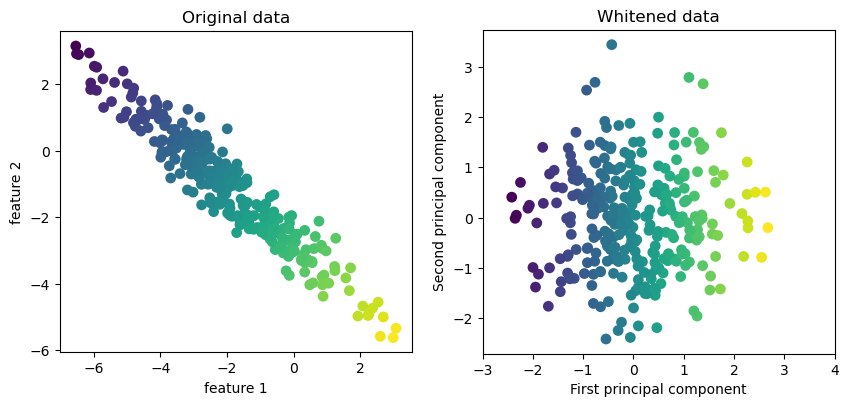

In [57]:
mglearn.plots.plot_pca_whitening();

In [141]:
pca = sklearn.decomposition.PCA(n_components=100, whiten=True, random_state=0);
X_train_pca = pca.fit_transform(X_train);
X_test_pca = pca.transform(X_test);

print("X_train_pca.shape: {}".format(X_train_pca.shape))
print("X_train.shape: {}".format(X_train.shape))

X_train_pca.shape: (1547, 100)
X_train.shape: (1547, 5655)


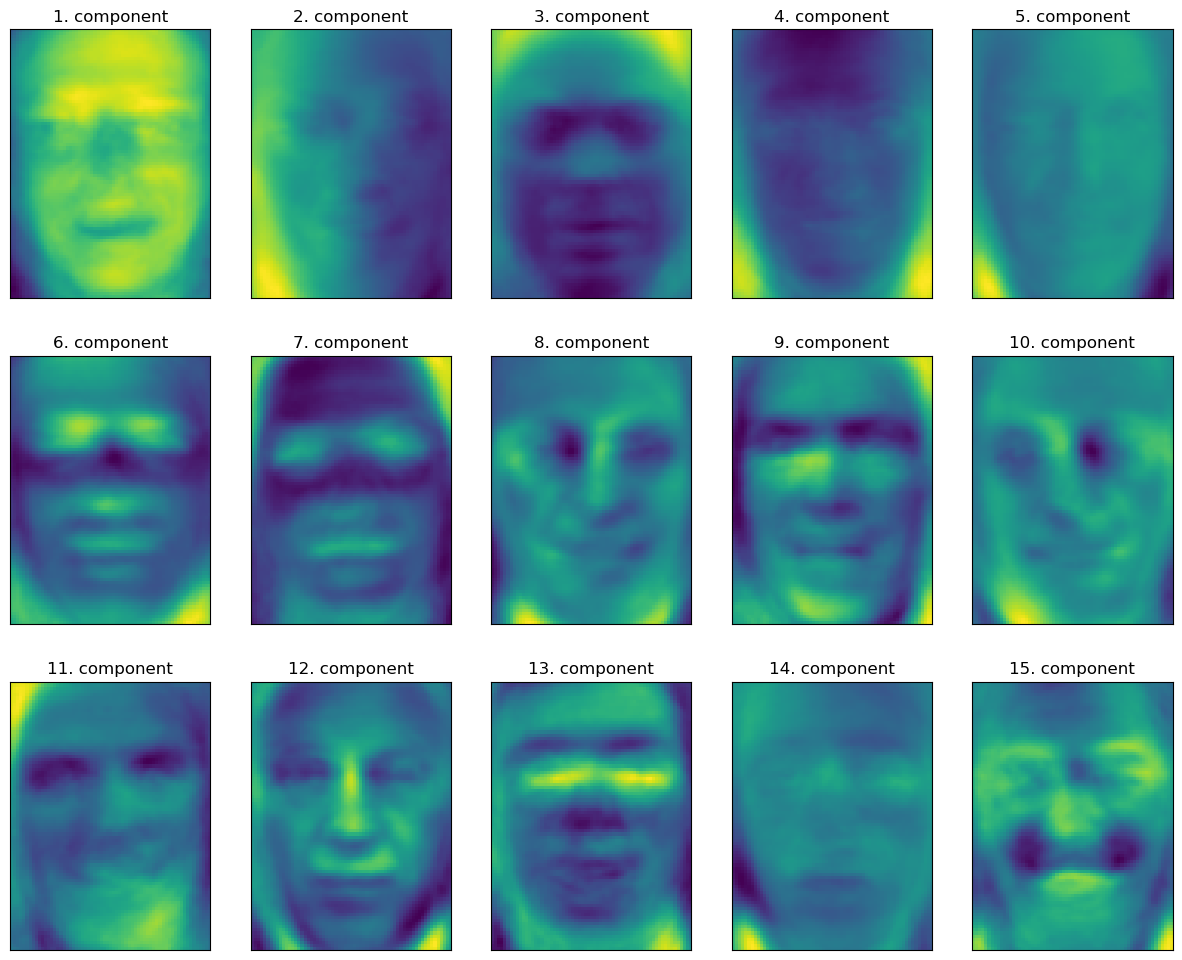

In [142]:
fix, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks': ()});

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis');
    ax.set_title("{}. component".format((i+1)));

In [143]:
knn.fit(X_train_pca, y_train);
print("Test set accuracy: {:4.2f} %".format(knn.score(X_test_pca, y_test)*100));


print("pca.components_.shape: {}".format(pca.components_.shape))

Test set accuracy: 29.65 %
pca.components_.shape: (100, 5655)


## Non-negative Matrix Factorisation (NMF)

C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1200: FutureWarning: The default value of `n_components` will change from `None` to `'auto'` in 1.6. Set the value of `n_components` to `None` explicitly to suppress the warning.
  warnings.warn(
C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1200: FutureWarning: The default value of `n_components` will change from `None` to `'auto'` in 1.6. Set the value of `n_components` to `None` explicitly to suppress the warning.
  warnings.warn(
C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


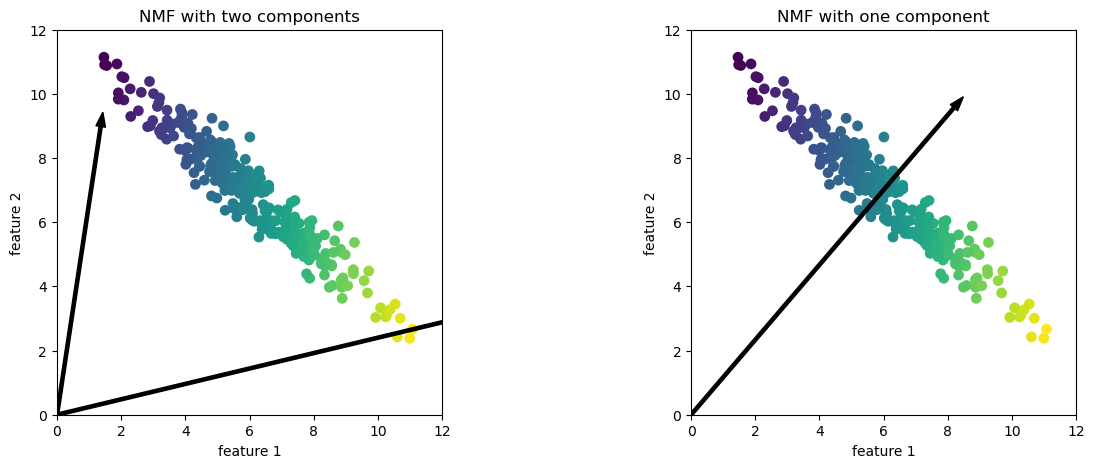

In [144]:
mglearn.plots.plot_nmf_illustration()

C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 120 reached. Increase it to improve convergence.
  warnings.warn(


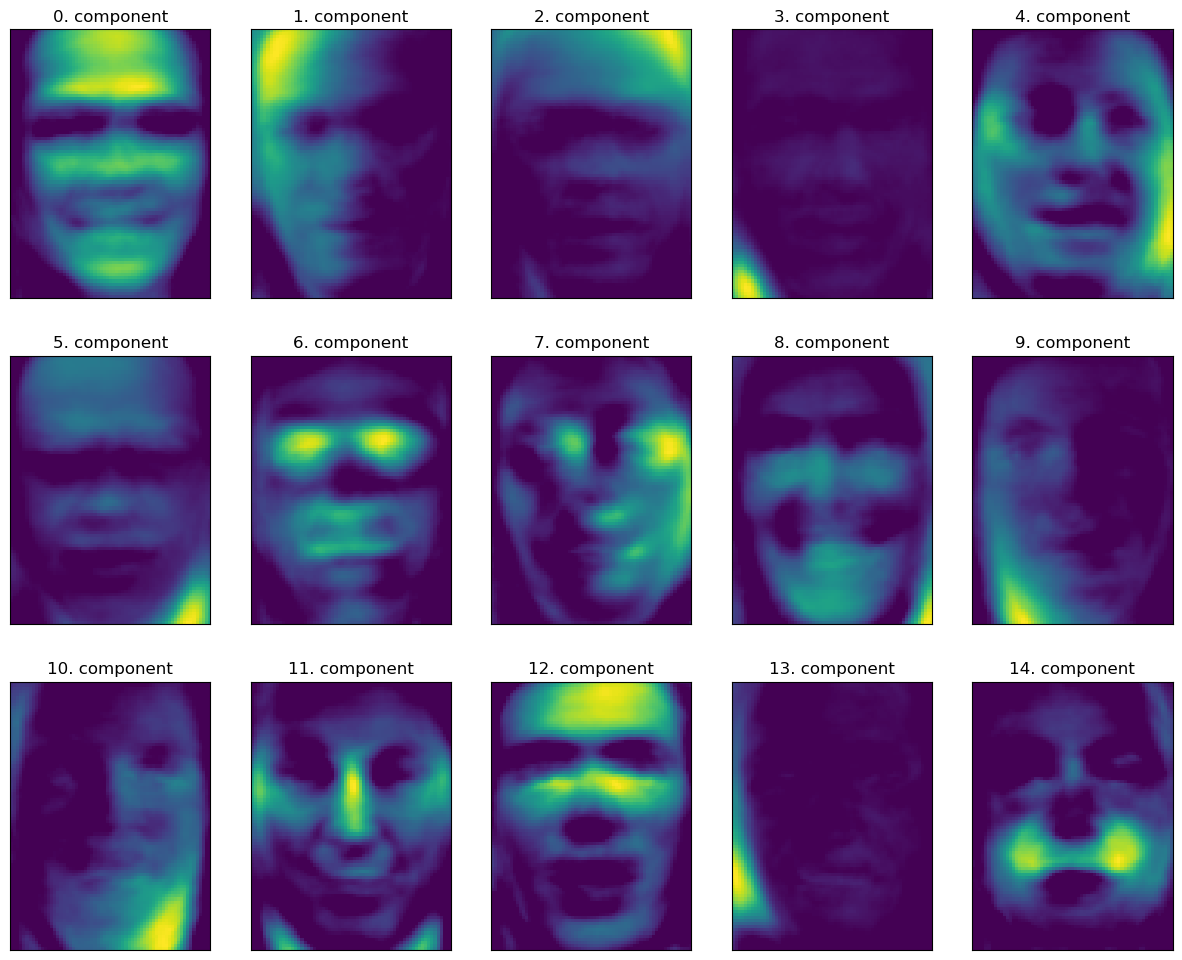

In [211]:
nmf = sklearn.decomposition.NMF(n_components=15, random_state=0, max_iter=120);
X_train_nmf = nmf.fit_transform(X_train);
X_test_nmf = nmf.transform(X_test);


fig, axes = plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()} );

for i, (component,ax) in enumerate(zip( nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(imag_shape));
    ax.set_title(f"{i}. component");

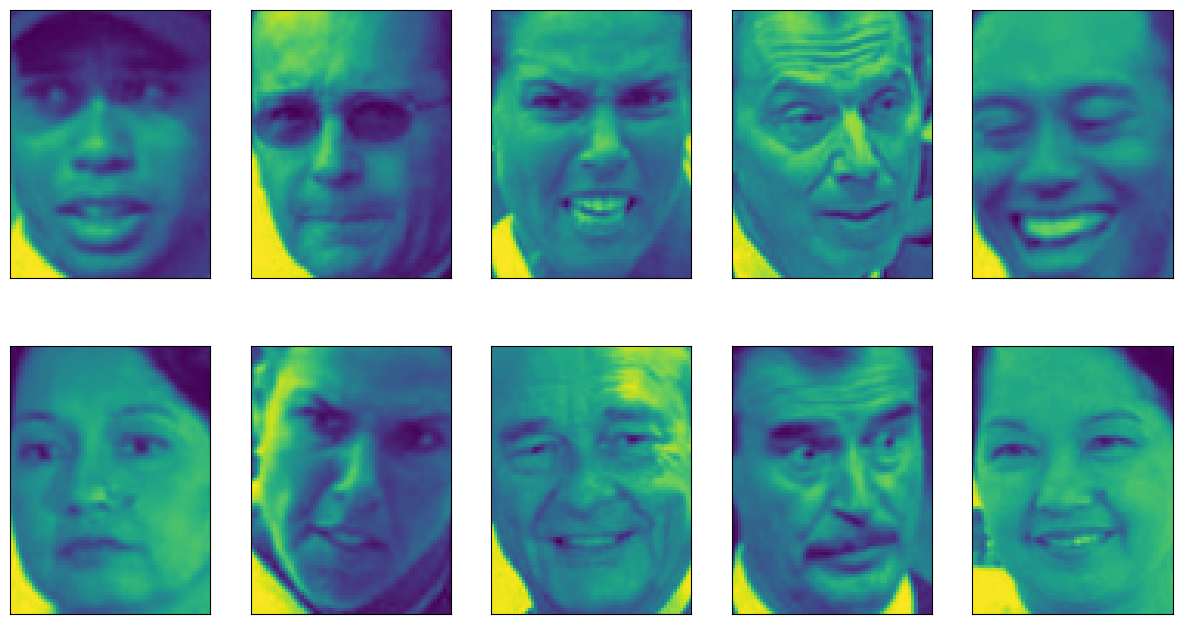

In [210]:
comp = 3;

ind = numpy.argsort(X_train_nmf[:,comp])[::-1];

fig, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()});

for i,(idx,ax) in enumerate(zip(ind, axes.ravel())):
    ax.imshow(X_train[idx].reshape(image_shape));

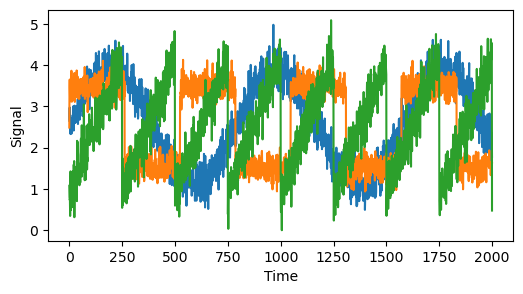

In [9]:
S = mglearn.datasets.make_signals();
plt.figure(figsize=(6,3));
plt.plot(S,'-');
plt.xlabel("Time");
plt.ylabel("Signal");

In [10]:
A = numpy.random.RandomState(0).uniform(size=(100,3))
X = numpy.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


Recovered signal shape: (2000, 3)


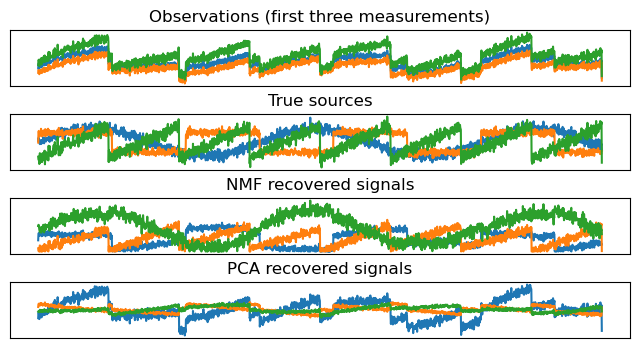

In [12]:
nmf = sklearn.decomposition.NMF(n_components=3, random_state=42);
S_ = nmf.fit_transform(X);
print("Recovered signal shape: {}".format(S_.shape))
pca = sklearn.decomposition.PCA(n_components=3);
H = pca.fit_transform(X);


models = [X, S, S_, H];
names = ['Observations (first three measurements)','True sources','NMF recovered signals','PCA recovered signals'];

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()});


for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

## Manifold Learning with t-SNE

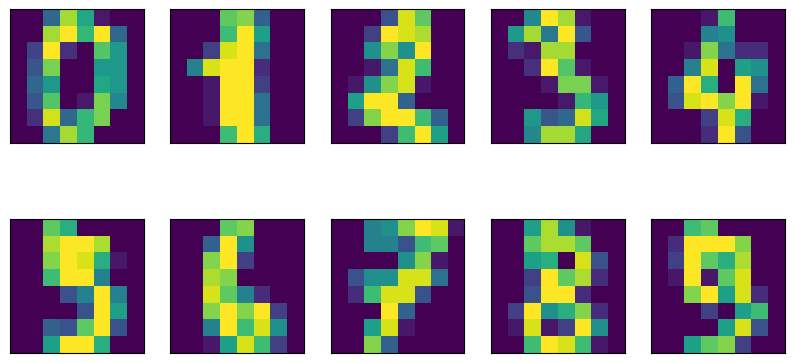

In [2]:
digits = sklearn.datasets.load_digits();

fig, axes = plt.subplots(2, 5, figsize=(10,5), subplot_kw={'xticks':(), 'yticks': ()});

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

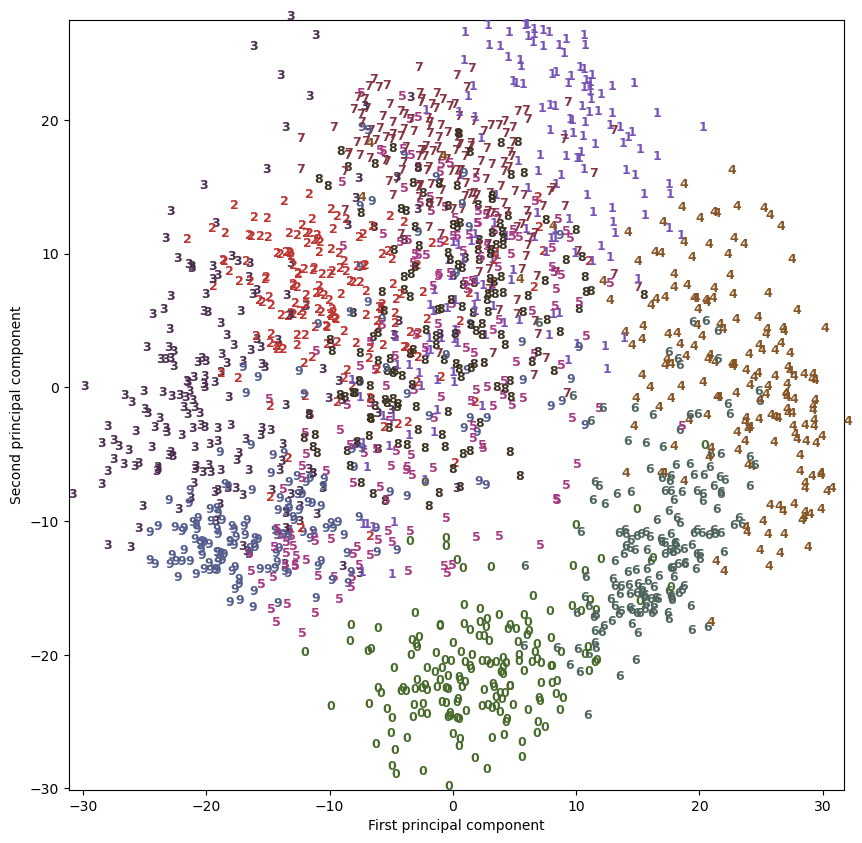

In [6]:
decompModel = sklearn.decomposition.PCA(n_components=2);
digits_plot = decompModel.fit_transform(digits.data);
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525","#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"];

plt.figure(figsize=(10, 10));
plt.xlim(digits_plot[:,0].min(), digits_plot[:,0].max());
plt.ylim(digits_plot[:,1].min(), digits_plot[:,1].max());

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_plot[i,0], digits_plot[i,1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9});

plt.xlabel("First principal component");
plt.ylabel("Second principal component");

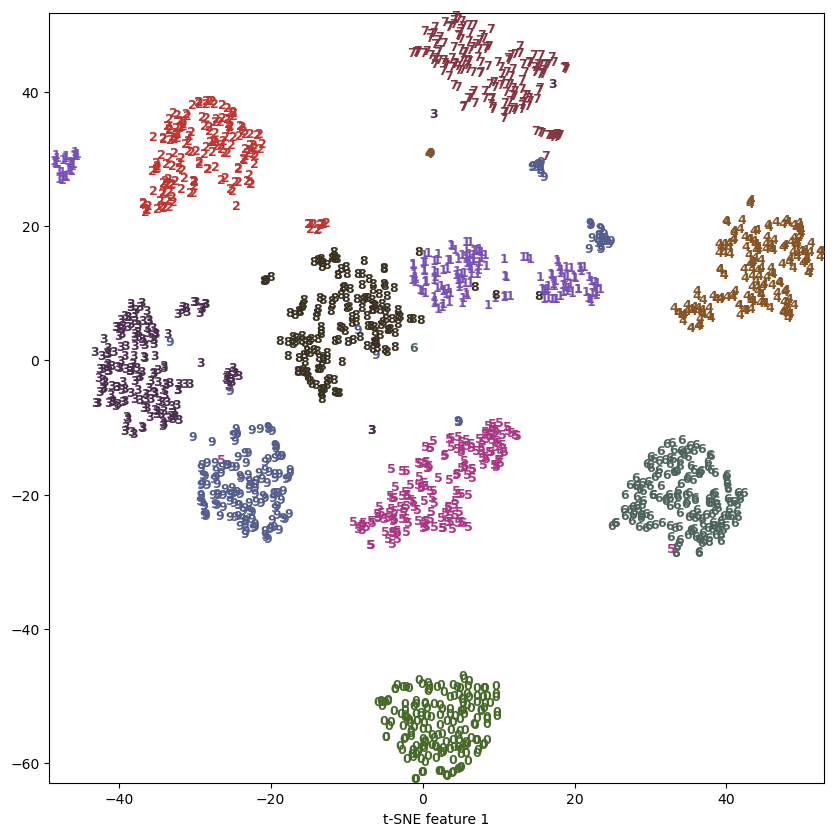

In [7]:
tsne = sklearn.manifold.TSNE(random_state=42);
digits_tsne = tsne.fit_transform(digits.data);

plt.figure(figsize=(10, 10));
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1);
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1);

for i in range(len(digits.data)):
# actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9});
    
plt.xlabel("t-SNE feature 0");
plt.xlabel("t-SNE feature 1");

## Clustering

### k-Mean Clustering

C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

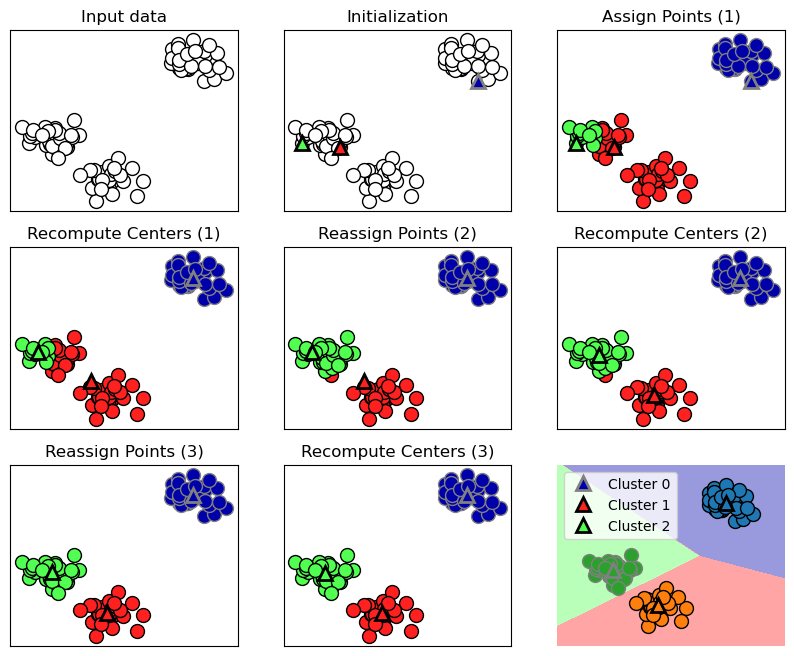

In [14]:
mglearn.plots.plot_kmeans_algorithm();
mglearn.plots.plot_kmeans_boundaries()

C:\Users\wilco\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


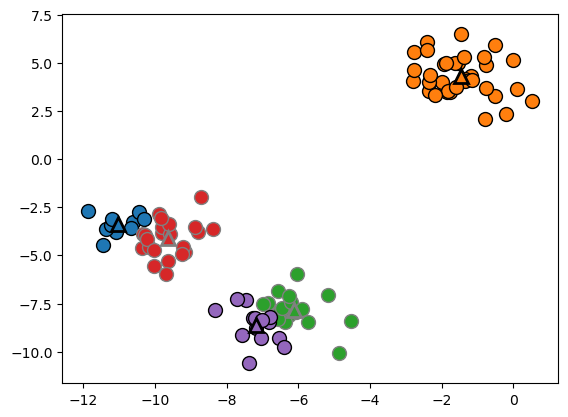

In [40]:
X, y = sklearn.datasets.make_blobs(random_state=1);

centroids, label, inertia = sklearn.cluster.k_means(X,n_clusters=5, random_state=2);

mglearn.discrete_scatter(X[:, 0], X[:, 1], label, markers='o');
mglearn.discrete_scatter(centroids[:, 0], centroids[:, 1], [0,1,2,3,5], markers='^',markeredgewidth=2);